In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('threads.csv')
df

,threads,energy,runtime,user-pct
0,1,0.729531,0.057712,0.9994
1,2,0.496542,0.028347,0.9973
2,3,0.485654,0.028883,0.6640
3,4,0.294143,0.018390,0.9931
4,5,0.258133,0.016936,0.9789
5,6,0.257207,0.016934,0.8194
6,7,0.236810,0.015586,0.8394
7,8,0.212392,0.013943,0.9455
8,9,0.230877,0.015166,0.7625
9,10,0.236273,0.015510,0.7653


In [77]:
df['W'] = df['energy'] / df['runtime']
df['energy-norm'] = df['user-pct'] * df['energy']

In [78]:
df['runtime-speedup'] = df['runtime'][1] / df['runtime']
df['energy-norm-speedup'] = df['energy-norm'][1] / df['energy-norm']

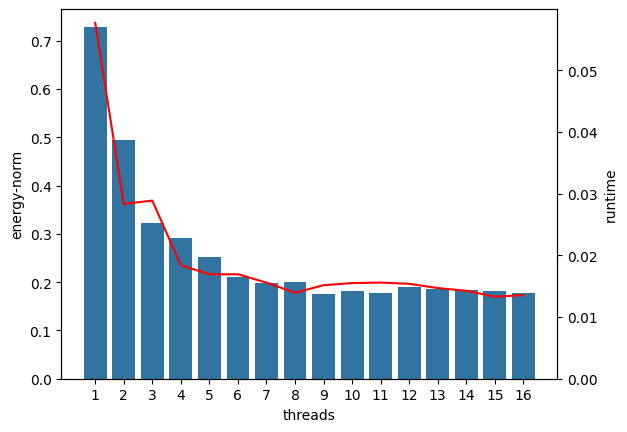

In [81]:
ax = sns.barplot(df, x='threads', y='energy-norm')

ax2 = ax.twinx()

sns.lineplot(df, x=df.index, y='runtime', color='r', ax=ax2)

ax2.set_ylim((0, None))

plt.show()

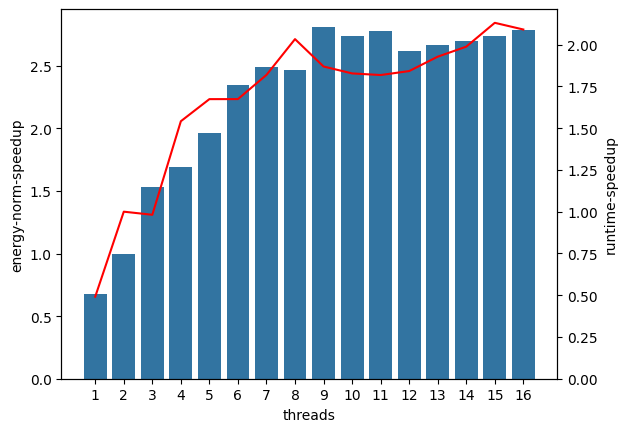

In [82]:
ax = sns.barplot(df, x='threads', y='energy-norm-speedup')

ax2 = ax.twinx()

sns.lineplot(df, x=df.index, y='runtime-speedup', color='r', ax=ax2)

ax2.set_ylim((0, None))

plt.show()